

## <font color = #99c9bd> **Analise Exploratória - Dados clientes Ifood**

<font color = #c6a9ac> **Temos aqui uma base de dados com informações dos clientes, queremos saber qual o perfil geral e também, de forma mais especifica, qual o perfil que gasta mais e é mais ativo na plataforma. É interessante saber quem é esse cliente que gasta muito e está mais conectado a plataforma, mas também quem gasta pouco e está mais desconectado, vamos ver se os dados que temos disponíveis nos ajuda a traçar esses dois perfis.**

<font color = #99c9bd> **Características Gerais do Dataset**

In [158]:
# Importando bibliotecas

import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [238]:
# baixando os dados

dados = pd.read_csv("/Users/thaisfernandespereira/Documents/estat_analises/descritiva/mkt_data.csv")

In [220]:
# dando uma olhada nas colunas e primeiras linhas dos dados

dados.head(5)

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


In [221]:
# dando uma olhada nas cateristicas baiscas das variáveis, tipo e quantidade de dados não nulos em cada coluna

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

<font color = #c6a9ac> Essa primeira olhada nos dados nos ajuda a entender as informaçǒes disponiveis para trabalhar, como elas estão organizadas, com base nisso podemos traçar algumas estratégias de análise, tendo em vista o objetivo final. 

Os dados interessantes para traçar um perfil dos clientes são: age, recency, marital_status, 'Kids', education_level, income e expenses,  NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

Escolhemos esses dados pois eles possibilitam combinar uma análise do perfil demográfico juntamente com o padrão de relacionamento com a plataforma. Podemos determinar qual tem sido o padrão de relacionamento de um determinado perfil demográfico. 

A seguir vamos filtrar a base de dados pelas variáveis de interesse e conhecê-las um pouco melhor.

In [239]:
# filtrando as variáveis de interesse

dados_1 = dados.rename(columns={
    'Age': 'Idade',
    'kids': 'Filhos',
    'Recency': 'Dias sem Acessar',
    'marital_status' :'Estado Civil',
    'education_level' : 'Nivel Educacional',
    'expenses': 'Gastos na Plataforma',
    'NumDealsPurchases': 'Compras na Promoção',
    'NumWebVisitsMonth': 'Visitas ao Site por mês'
})

variaveis_interesse = [
   'Idade',
    'Filhos',
    'Dias sem Acessar',
    'Estado Civil',
    'Nivel Educacional',
    'Gastos na Plataforma',
    'Compras na Promoção',
    'Visitas ao Site por mês',
    'Income'
]

dados_1 = dados_1[variaveis_interesse]

# verificando quantidade de nulos nas variáveis de interesse

dados_1.isnull().sum()

Idade                      0
Filhos                     0
Dias sem Acessar           0
Estado Civil               0
Nivel Educacional          0
Gastos na Plataforma       0
Compras na Promoção        0
Visitas ao Site por mês    0
Income                     0
dtype: int64

In [240]:
qtd_duplicadas = dados_1.duplicated().sum()

print(f"Número de linhas duplicadas: {qtd_duplicadas}")

Número de linhas duplicadas: 203


In [241]:
# Verificando se há linhas duplicadas

dados_1 = dados_1.drop_duplicates()

In [242]:
# Ajustando os dados de renda para o formato mensal

dados_1['Renda Mensal'] = dados_1['Income'] / 12

# Excluindo as linhas duplicadas: 

dados_2 = dados_1.drop('Income', axis=1)

In [243]:
dados_2.describe(include='all').round()

,Idade,Filhos,Dias sem Acessar,Estado Civil,Nivel Educacional,Gastos na Plataforma,Compras na Promoção,Visitas ao Site por mês,Renda Mensal
count,2002.0,2002.0,2002.0,2002,2002,2002.0,2002.0,2002.0,2002.0
unique,NaN,NaN,NaN,5,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Married,Graduation,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,778,1010,NaN,NaN,NaN,NaN
mean,51.0,1.0,49.0,NaN,NaN,564.0,2.0,5.0,4307.0
std,12.0,1.0,29.0,NaN,NaN,576.0,2.0,2.0,1727.0
min,24.0,0.0,0.0,NaN,NaN,4.0,0.0,0.0,144.0
25%,43.0,0.0,24.0,NaN,NaN,55.0,1.0,3.0,2952.0
50%,50.0,1.0,49.0,NaN,NaN,343.0,2.0,6.0,4287.0
75%,61.0,1.0,74.0,NaN,NaN,962.0,3.0,7.0,5692.0


<font color = #c6a9ac> Até aqui vimos que as variáveis de interesse não possuem valores nulos, mas encontramos 203 linhas duplicadas que resolvemos excluir para não atrapalhar a análise. 

Abaixo rodamos um describe, para obter informações gerais e rápidas dos dados numéricos. Aqui podemos tomar notas de algumas informações importantes: 

1. **Idade:** A média dos clientes da base variam bastante, 24 a 80 anos. Mas a média é 51 e a mediana é 50 o que demonstra que a distribuição é relativamente simétrica em torno dessa faixa, considerando o desvio padrão os usuários dessa amostra estão entre 39 a 63 anos, isso sugere que público predominante eentre meia-idade e o começo da terceira idade com poucos usuários muito velhos ou muito jovens. A média sendo um pouco mais alta que a mediana, mesmo que pouco, pode indicar cauda da distribuição mais longa para à direita em direção à idades mais altas

2. **Filhos:** Em média os clientes tem 1 filhos, no mínimo nenhum e no máximo 3 filhos, até 75% tem no máximo um filho, ou seja, poucos clientes com mais de 1 filho

3. **Útima compra**: Há desde compradores muito recentes até pessoas inativas por mais de 3 meses, a alta variabilidade indica muitos perfis de compra, podendo ser classificados como usuários recentes, médios e inativos 

4. **Renda:** Em média os clientes tem renda de 4.300 reais podendo chegar a 9 mil, com alta dispersão, dado o desvio padrão indicado. Essa amostra possivelmente tem outliers de baixa renda, todavia a média é maior que a mediana o que pode indicar assimetria à direita, em direção a valores mais altos

5. **Gastos na Plataforma**: A mediana é consideravelmente menor que a média o que indica assimetria à direita, ou seja, poucos usuários gastam muito elevando a média. O desvio padrão é muito alto, o que indica possíveus outliers com valores altos impactando a média. Metade dos usuários gastam até 343 reais, e 75% deles até 964 reais, a maioria gasta pouco. 

6. **Compras na promoção:** A maioria dos clientes fez entre 1 e 3 compras em promoção, a diferença entre o terceiro quartil e 0 máximo indicam presença de outliers, existem poucos clientes que compram muito, mas poucos a ponto de não influenciar tanto a média que é a mesma que mediana. 

7. E para os demais, que mostram onde o cliente faz mais compras, se na web, no catalogo ou diretamente nas lojas, em média parece que diretamente na loja é uma preferência

8. **Visitas ao Site:** A maioria dos usuários visitou o site entre 3 e 7 vezes, a mediana sendo maior que a média indica que alguns numeros muitos baixos puxam a média para baixo, porém a dispesão dessa distribuição é relativamente pequena, existindo possivelmente alguns poucos clientes altamente engajados dado o máximo tão distante da média. 

Essa análise é boa para nos dizer aspectos gerais dos clientes, agora sabemos que parece um perfil mais velho, que gosta de comprar diretamente na loja, que tem uma renda abaixo de 5 mil reais, que demora para acessar a plataforma, não visita muito o site nem compra muito em promoções e prefere comprar diretamente nas lojas. Na próxima seção vamos aprofundar essa análise para tirar dúvidas e ajudar na etapa de seguimentação, onde iremos dizer o comportamento de cada tipo de cliente. Aqui ainda não analisamos nível educacional nem estado civil, essas variáveis junto com a renda e idade nos ajudarão a seguimentar melhor os perfis dos clientes e descobrir como cada perfil se relaciona com a plataforma. 

<font color = #99c9bd> **Análise Exploratória Aprofundada: Entendendo Melhor o Perfil do Cliente**

<font color = #c6a9ac> **Análise por tipo de variável**

<font color = #c6a9ac> **1. Variáveis Numéricas**

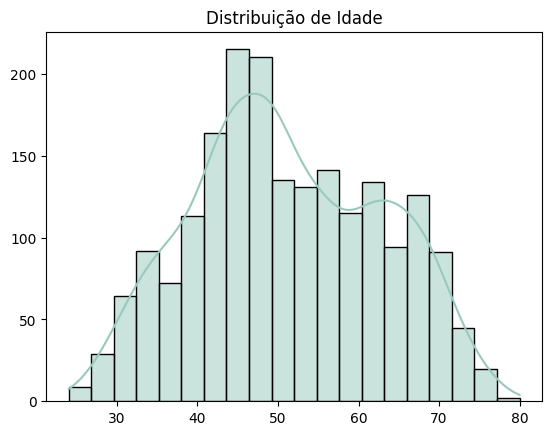

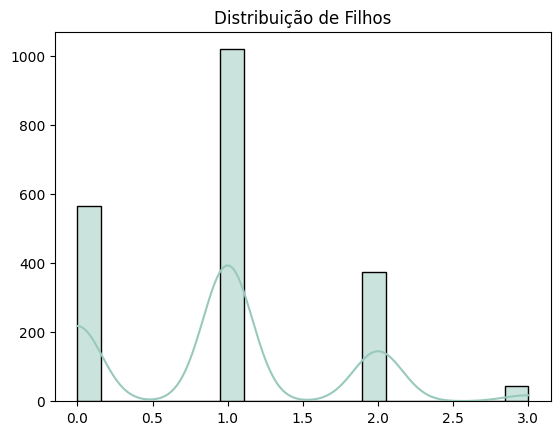

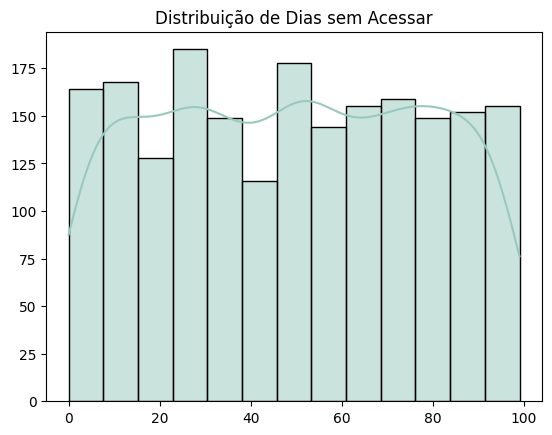

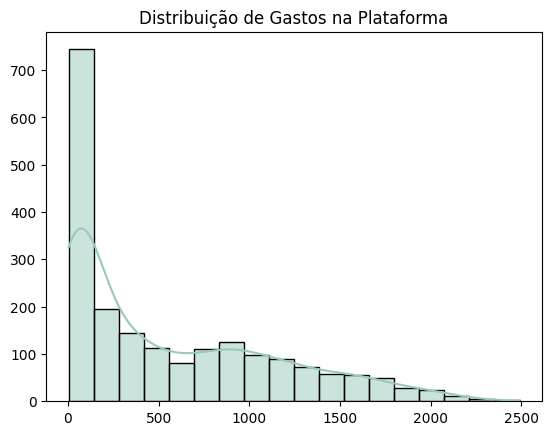

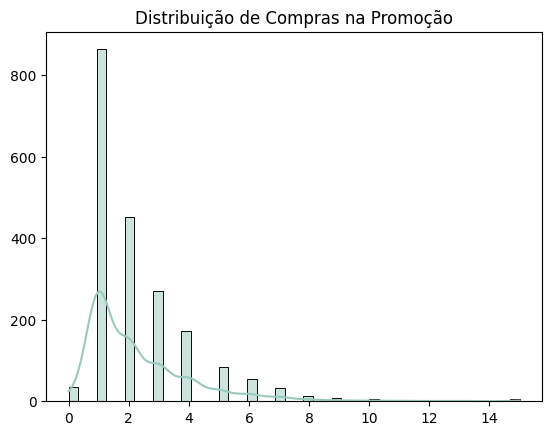

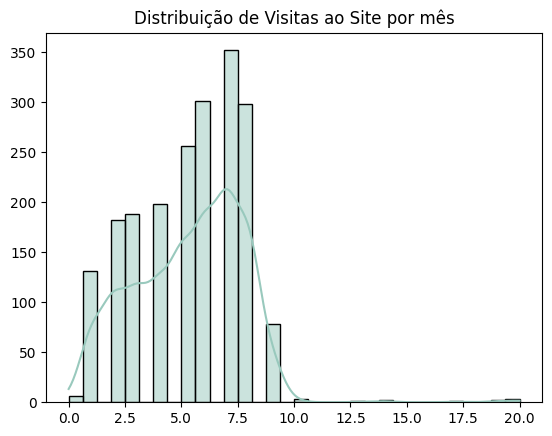

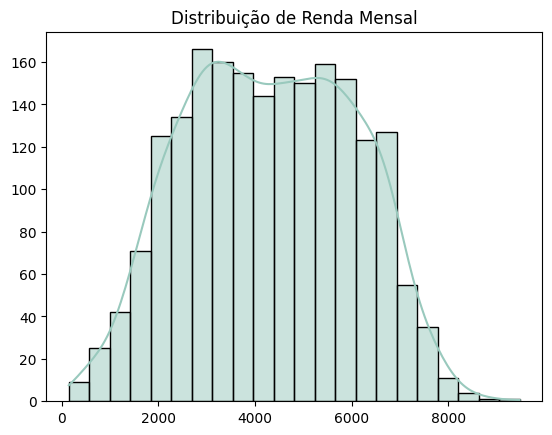

In [246]:
numeric_vars = dados_2.select_dtypes(include='number').columns

# Histogramas + KDE
for var in numeric_vars:
    plt.figure()
    sn.histplot(dados_1[var], kde=True, color= '#99c9bd')
    plt.title(f"Distribuição de {var}")
    plt.ylabel('')
    plt.xlabel('')
    plt.show()

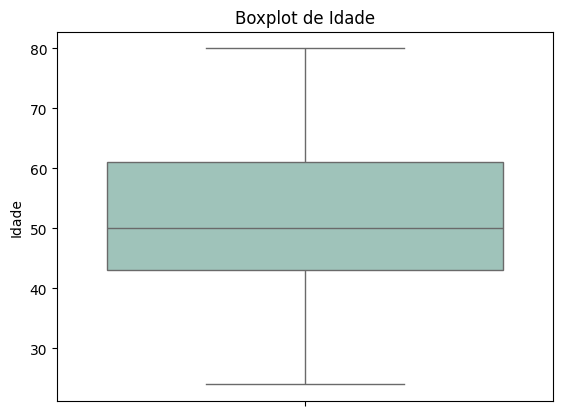

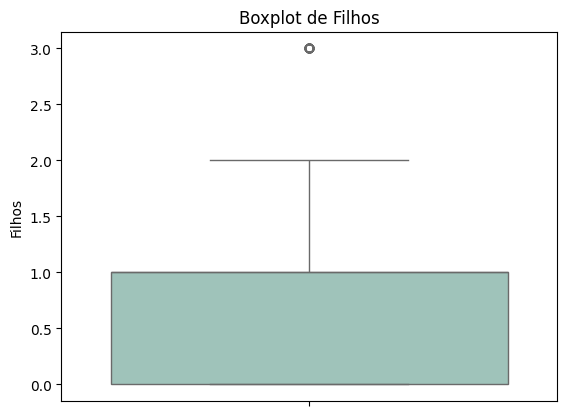

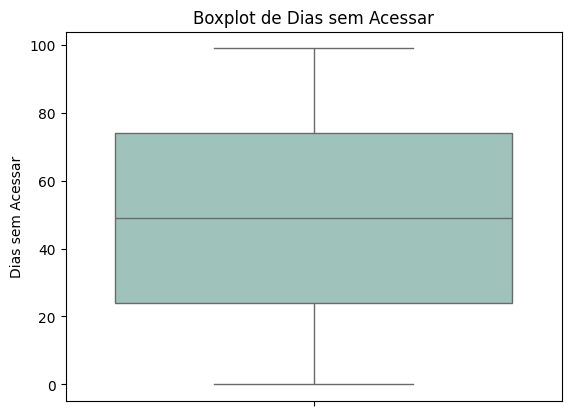

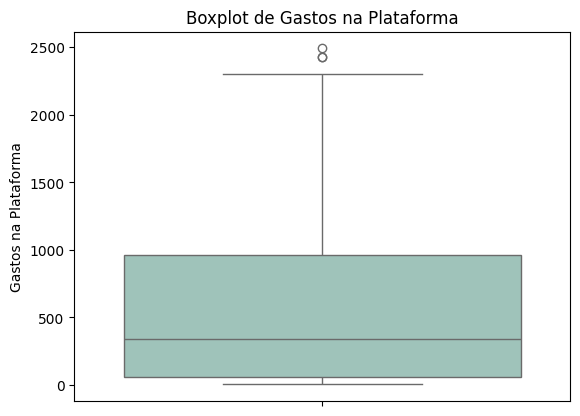

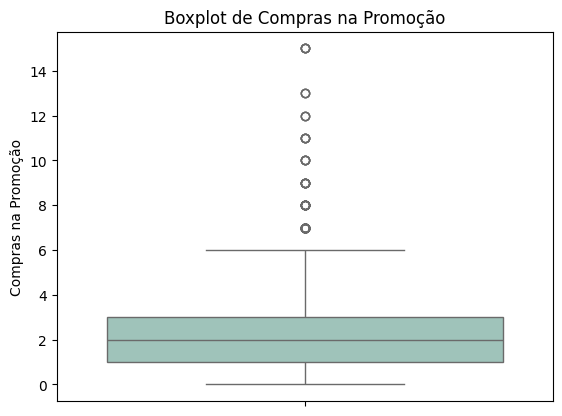

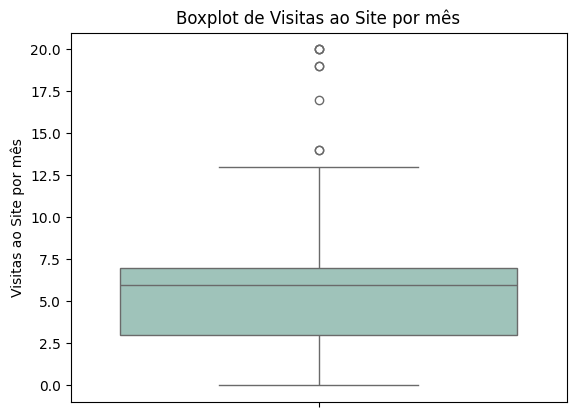

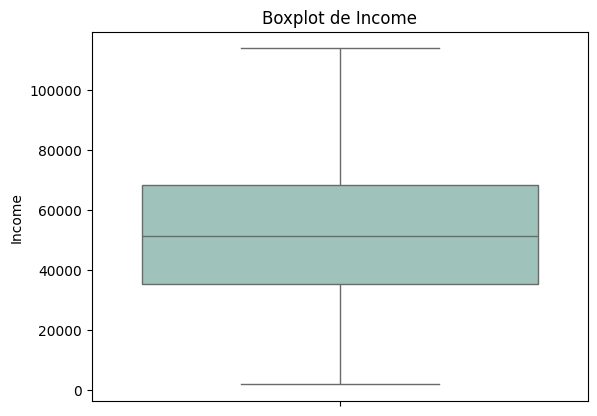

In [207]:
# Boxplots (para detectar outliers)
for var in numeric_vars:
    plt.figure()
    sn.boxplot(y=dados_2[var], color= '#99c9bd')
    plt.title(f"Boxplot de {var}")
    plt.show()

<font color = #c6a9ac> **2. Variáveis Categóricas**

In [253]:
# Valores distintos da formaçao academica

dados_2['Nivel Educacional'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [252]:
# Qual é o nivel educacional dos clientes? 

contagem = dados_2['Nivel Educacional'].value_counts()

percentual = dados_2['Nivel Educacional'].value_counts(normalize=True)* 100

pd.DataFrame({
    'Quantidade': contagem,
    'Percentual (%)': percentual.round(1)

})

,Quantidade,Percentual (%)
Nivel Educacional,,
Graduation,1010,50.4
PhD,431,21.5
Master,331,16.5
2n Cycle,181,9.0
Basic,49,2.4


In [249]:
# Valores distintos do estado civil

dados_2['Estado Civil'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow'], dtype=object)

In [250]:
# Qual é o estado civil dos clientes? 

contagem = dados_2['Estado Civil'].value_counts()

percentual = dados_2['Estado Civil'].value_counts(normalize=True)* 100

pd.DataFrame({
    'Quantidade': contagem,
    'Percentual (%)': percentual.round(1)

})

,Quantidade,Percentual (%)
Estado Civil,,
Married,778,38.9
Together,505,25.2
Single,439,21.9
Divorced,211,10.5
Widow,69,3.4


In [276]:
# Qual é o estado civil dos clientes? 

contagem = dados_2['Filhos'].value_counts()

percentual = dados_2['Filhos'].value_counts(normalize=True)* 100

pd.DataFrame({
    'Quantidade': contagem,
    'Percentual (%)': percentual.round(1)

})

,Quantidade,Percentual (%)
Filhos,,
1,1018,50.8
0,564,28.2
2,375,18.7
3,45,2.2


Nessa seção tentamos entender mais profundamente o perfil dos clientes da base de dados olhando as distribuições. Levando em conta os dados gerais levantados anteriormente, vamos aos insights que essa análise mais detalhada possibilitou: 

1. **Idade**: Tinhamos uma ideia de que a idade variava bastante (de 24 a 80 anos). Com o histograma e o bloxplot está evidente que o publico da plataforma está bem concentrado entre as faixas 40 - 50 anos, antes dos 40 e depois dos 70 é escasso o numero de clientes. Sendo que próximo dos 50 existem alguns picos de quantidade de clientes. Para analisar a relacao do consumo na plataforma e a idade do cliente podemos criar faixas de "Até 40 anos", "De 41 a 60" e "De 61 a 80"
2. **Filhos**: A quantidade de filhos é uma variável que pode ser analisada como categórica, por isso olhamos o boxplot mas também a frequência relativa. Na primeira análise mais geral sabíamos que a quantidade variava entre 0 e 3, No boxplot vimos que 3 filhos são outliers, 2 filhos é o limite superior e a maioria dos clientes tem ou nnenhum filho ou apenas 1. Na tabela de frequência isso fica ainda mais claro: 50% dos clientes tem 1 filho, 28% nenhum e 18% tem 2 filhos.
3. **Última compra:** 

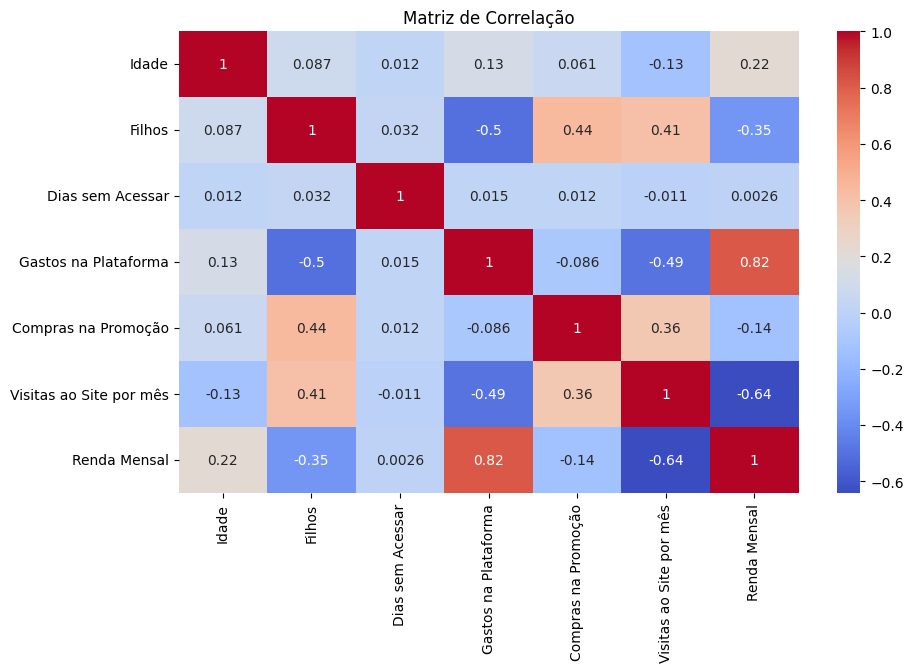

In [247]:
# Correlação entre variáveis numéricas
plt.figure(figsize=(10, 6))
sn.heatmap(dados_2[numeric_vars].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()


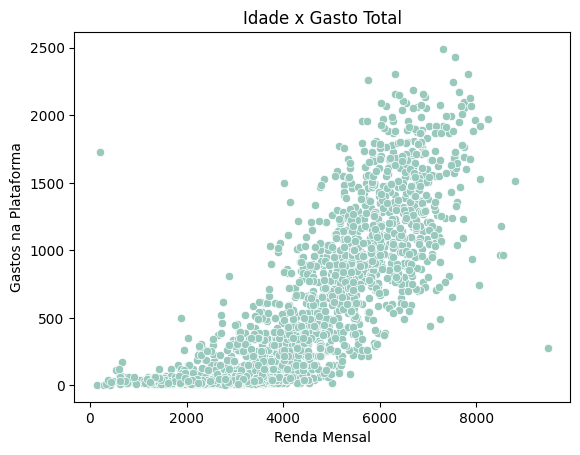

In [272]:
# Exemplo: relação entre idade e gasto total
sn.scatterplot(data=dados_2, x='Renda Mensal', y='Gastos na Plataforma', color= '#99c9bd')
plt.title("Idade x Gasto Total")
plt.show()

<font color = #99c9bd> **Construindo o perfil dos clientes**

In [ ]:
# construindo vriaveis categoricas a partir das variaveis quantitativas

def engajamento(visitas):
    if visitas == 0:
        return 'Inativo'
    elif 1 <= visitas <= 3:
        return 'Pouco engajado'
    elif 4 <= visitas <= 7:
        return 'Engajamento médio'
    else:
        return 'Usuário frequente'

dados_1['engajamento'] = dados_1['Visitas ao Site por mês'].apply(engajamento)


# construindo uma variavel categorica de filhos

In [152]:
dados.groupby('marital_status')['kids'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)

,media,mediana,desvio_padrao
marital_status,,,
Divorced,1.01,1.0,0.74
Married,0.97,1.0,0.73
Single,0.86,1.0,0.78
Together,0.98,1.0,0.75
Widow,0.88,1.0,0.75


/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/3288484017.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'tem_filhos', y = 'expenses', data = dados, linewidth=1, palette = colors)


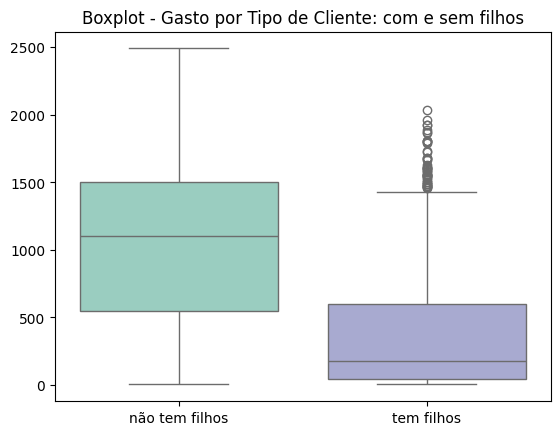

In [83]:
# As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?

dados['tem_filhos'] = np.where(dados['kids'] == 0, 'não tem filhos', 'tem filhos')

colors = "#92d5c4", "#a1a4d7"

sn.boxplot(x = 'tem_filhos', y = 'expenses', data = dados, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Cliente: com e sem filhos')

plt.show()

/var/folders/x8/b89wn3vx0jd4cmv6h5_4cv6m0000gn/T/ipykernel_83269/2575319134.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x = 'faixa_salarial', y = 'expenses', data = dados, linewidth=1, palette = colors)


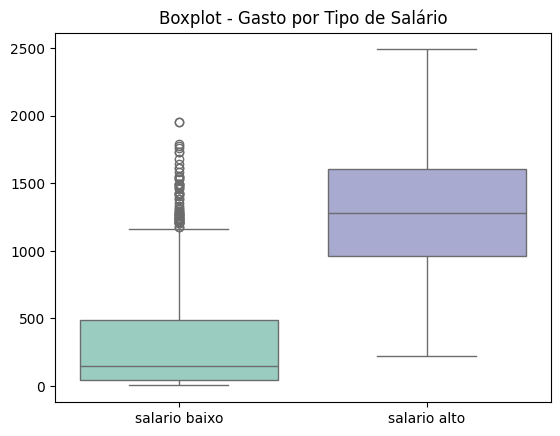

In [90]:
# Pessoas que têm um maior salário gastam mais?

q3 = dados['renda_mensal'].quantile(0.75)

dados['faixa_salarial'] = dados['renda_mensal'].apply(lambda x: 'salario alto' if x > q3 else 'salario baixo')

dados['faixa_salarial'].value_counts()

colors = "#92d5c4", "#a1a4d7"

sn.boxplot(x = 'faixa_salarial', y = 'expenses', data = dados, linewidth=1, palette = colors)
plt.ylabel('')
plt.xlabel('')
plt.title('Boxplot - Gasto por Tipo de Salário')

plt.show()

In [91]:
dados.groupby('faixa_salarial')['expenses'].agg(media= 'mean', mediana='median', desvio_padrao='std' ).round(2)

,media,mediana,desvio_padrao
faixa_salarial,,,
salario alto,1293.50,1279.0,437.41
salario baixo,319.33,144.5,375.93
